In [1]:
#Importing required packages

%pylab nbagg
%matplotlib inline
from scipy.optimize import curve_fit
import csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Importing data from CSV file and converting to float

data = np.genfromtxt('data.csv',delimiter=',',dtype=float)

In [3]:
ra = np.array([r[1] for r in data])
dec = [d[2] for d in data]
raErr = [rae[3] for rae in data]
decErr = [de[4] for de in data]
r = [rm[5] for rm in data]
err_r = [rerr[6] for rerr in data]
extinction_r = [ext[7] for ext in data]
z = [red[8] for red in data]
zErr = [reder[9] for reder in data]
snMedian_r = [sn[10] for sn in data]

len(data)

930

In [4]:
print(ra)

#ra has nan values in it, and so do the other categories so we need to remove them in order to complete the analysis

ra = np.delete(ra,0)
dec = np.delete(dec,0)
raErr = np.delete(raErr,0)
decErr = np.delete(decErr,0)
r = np.delete(r,0)
err_r = np.delete(r,0)
extinction_r = np.delete(extinction_r,0)
z = np.delete(z,0)
zErr = np.delete(zErr,0)
snMedian_r = np.delete(snMedian_r,0)

#Printing one of the categories to check if the nan values are removed

print(ra)

[         nan 195.09458906 196.72898941 195.43325006 195.02733664
 194.39119153 194.70391906 195.18279477 196.65503843 196.97307643
 193.73089829 193.23634507 194.23574351 193.51033158 193.86009957
 194.94113203 193.00152328 193.18362252 193.9028427  194.31252257
 194.87713224 193.02861864 193.04932457 193.47585926 194.1160598
 194.21320643 194.42930797 194.84209375 193.56677955 193.85185726
 194.48072587 195.29470993 194.11093283 194.00801422 194.36726359
 194.47137605 194.78121217 194.77852516 195.41894676 195.53903211
 196.26376074 193.3274554  193.54159508 193.73652002 193.8155569
 194.16001389 194.2182205  194.40496564 194.44460838 194.57252173
 194.94903631 195.01850234 195.07866822 195.17813251 195.21315046
 195.68498497 195.96165375 195.9428287  195.88014036 195.90241355
 195.96040532 196.65163563 196.84685473 193.81206539 194.07747887
 194.27005867 195.57405155 196.41296984 193.90597146 193.07259588
 193.07382756 195.01829475 195.15475126 195.79056921 195.44611198
 196.0746788

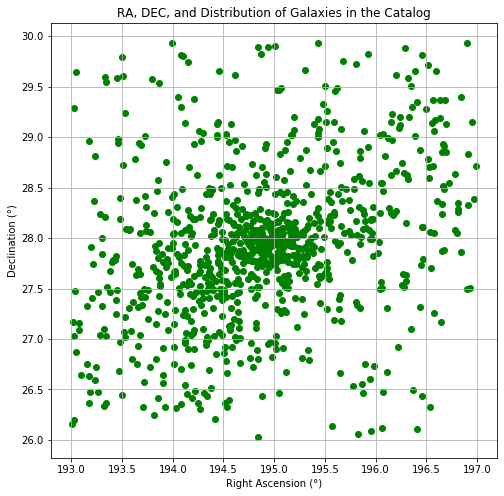

In [5]:
#Plotting RA and DEC

plt.figure(figsize=(8,8))
plt.scatter(ra,dec,c='g')
plt.xlabel('Right Ascension (°)')
plt.ylabel('Declination (°)')
plt.grid()
plt.title('RA, DEC, and Distribution of Galaxies in the Catalog')
plt.savefig('RA, DEC, and Distribution of Galaxies in the Catalog')

In [6]:
#Weighted means of RA and DEC

rar = ra*r
decr = dec*r

weightedra = sum(rar)/sum(r)
weighteddec = sum(decr)/sum(r)

print("The weighted mean of right ascension is:",weightedra)
print("The weighted mean of declination is:",weighteddec)

The weighted mean of right ascension is: 194.87101531123176
The weighted mean of declination is: 27.933691590479402


The redshift for the Coma Cluster is: 0.023382687104674903
The uncertainty is: 0.0030813139163038275


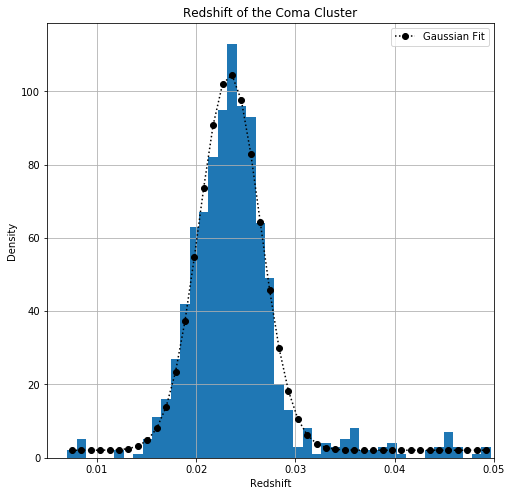

In [7]:
#Plotting histogram of redshift

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n

#Fitting Gaussian onto histogram:

#the "Gfunc" function calculates the Gaussian distribution
#the "Gfit" function calculates the Gaussian fit to impose it on the histogram

def Gfunc(x,H,A,x0,sigma):
    return H + A*exp(-(x-x0)**2 / (2*sigma**2))

def Gfit(x,y):
    mean = sum(x*y)/sum(y)
    sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))
    popt,pcov = curve_fit(Gfunc,x,y,p0=[min(y),max(y),mean,sigma])
    return popt

H,A,x0,sigma = Gfit(xdata,ydata)
redcoma = x0
uncertainty = sigma

print("The redshift for the Coma Cluster is:",x0)
print("The uncertainty is:", sigma)

#Plotting Guassian

plt.plot(xdata,Gfunc(xdata, *Gfit(xdata,ydata)),'ko:',label='Gaussian Fit')
plt.legend()
plt.xlim(0.005,0.05)
plt.ylabel("Density")
plt.xlabel("Redshift")
plt.grid()
plt.title("Redshift of the Coma Cluster")
plt.savefig('Redshift of Coma Cluster')

In [8]:
#Recessional velocity of Coma Cluster

recvel = redcoma * 3e5
recvel_error = (sigma/redcoma)*recvel

print("The recessional velocity of the Coma Cluster is:",recvel,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [9]:
#Distance to Coma Cluster

H = 67.8 #km/s/Mpc
dist = recvel/H
dist_error = (recvel_error/recvel)*dist

print("The distance to the Coma Cluster is:",dist,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [10]:
#Converting data into a dictionary format

with open('data.csv') as d:
    reader = csv.DictReader(d)
    data = [n for n in reader]
    
for n in data:
    for m in n:
        n[m] = float(n[m])
        
ra = [n['ra'] for n in data]
dec = [n['dec'] for n in data]
z = [n['z'] for n in data]

In [11]:
#Projected radial distance of Coma Cluster

#The "raDist" function calculates the angular separations in RA and DEC from the center to the galaxy, converts that in AU, and gets the radius in units of pc

def raDist(ra,dec,RA,DEC,distance):
    a = [dec,DEC]
    angsepra = ((RA-ra)*cos(mean(a)))*3600
    angsepdec = (DEC-dec)*3600
    RAD = (sqrt(angsepra**2 + angsepdec**2))*(distance*10**6)
    rad = RAD*4.84814e-6
    return rad

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra,weighteddec,dist)

In [12]:
#The purpose of the code below is to find "member galaxies" within 1.5 Mpc with an uncertainty of ± 3sigma

data2 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma-d['z']) <= (3*sigma):
        data2.append(d)
        
len(data2)

463

Repeat steps 3-6 using only the 463 member galaxies to determine the sky position better

In [13]:
#Getting the weighted means of right ascensions and declinations

r2 = [d['r'] for d in data2]
raw2 = [d['ra']*d['r'] for d in data2]
decw2 = [d['dec']*d['r'] for d in data2]
z2 = [d['z'] for d in data2]

weightedra2 =  sum(raw2)/sum(r2)
weighteddec2 = sum(decw2)/sum(r2)

print("The weighted mean of right ascension using member galaxies is:",weightedra2)
print("The weighted mean of declination using member galaxies is:",weighteddec2)

The weighted mean of right ascension using member galaxies is: 194.83163907143054
The weighted mean of declination using member galaxies is: 27.89695277815047


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


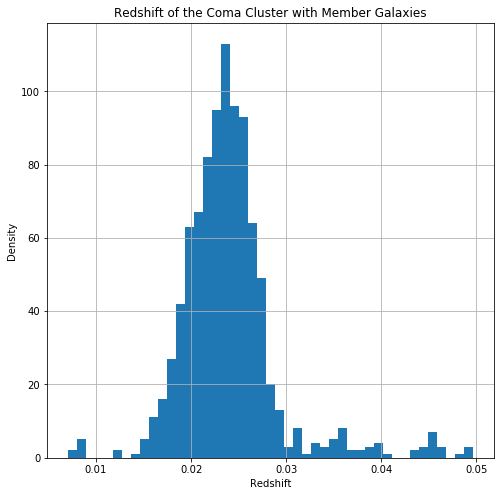

In [14]:
#Getting the new histogram with member galaxies

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma2 = x0
uncertainty2 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [15]:
#Recessional velocity of Coma Cluster with member galaxies

recvel2 = redcoma2 * 3e5
recvel_error2 = (sigma/redcoma2)*recvel2

print("The recessional velocity of the Coma Cluster is:",recvel2,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error2,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [16]:
#Distance to the Coma Cluster with member galaxies

H = 67.8 #km/s/Mpc
dist2 = recvel2/H
dist_error2 = (recvel_error2/recvel2)*dist2

print("The distance to the Coma Cluster is:",dist2,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error2,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [17]:
#Projected radial distance for Coma Cluster with member galaxies

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra2,weighteddec2,dist2)

Iterating for a third time:

In [18]:
data3 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma2-d['z']) <= (3*sigma):
        data3.append(d)
        
len(data3)

470

In [19]:
#Getting the weighted means of right ascensions and declinations for a 3rd time

r3 = [d['r'] for d in data3]
ra3 = [d['ra']*d['r'] for d in data3]
dec3 = [d['dec']*d['r'] for d in data3]
z3 = [d['z'] for d in data3]

weightedra3 = sum(ra3)/sum(r3)
weighteddec3 = sum(dec3)/sum(r3)

print("The weighted mean of right ascension using member galaxies is:",weightedra3)
print("The weighted mean of declination using member galaxies is:",weighteddec3)

The weighted mean of right ascension using member galaxies is: 194.81188036993478
The weighted mean of declination using member galaxies is: 27.883555561449423


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


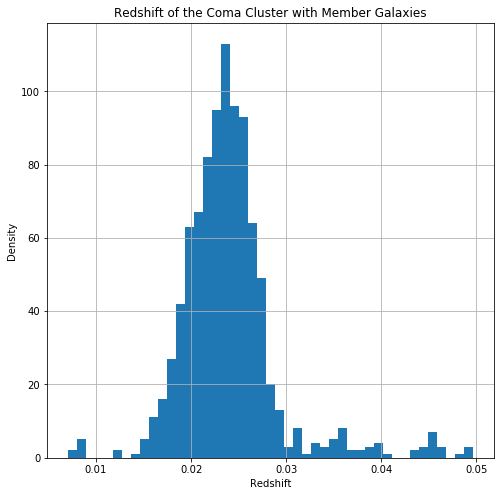

In [20]:
#Getting the new histogram with member galaxies for a 3rd time

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma3 = x0
uncertainty3 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [21]:
#Recessional velocity of Coma Cluster with member galaxies for a 3rd time

recvel3 = redcoma3 * 3e5
recvel_error3 = (sigma/redcoma3)*recvel3

print("The recessional velocity of the Coma Cluster is:",recvel3,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error3,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [22]:
#Distance to the Coma Cluster with member galaxies for a 3rd time

H = 67.8 #km/s/Mpc
dist3 = recvel3/H
dist_error3 = (recvel_error3/recvel3)*dist3

print("The distance to the Coma Cluster is:",dist3,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error3,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [23]:
#Projected radial distance for Coma Cluster with member galaxies

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra3,weighteddec3,dist3)

Iterating for a fourth time:

In [24]:
data4 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma2-d['z']) <= (3*sigma):
        data4.append(d)
        
len(data4)

467

In [25]:
#Getting the weighted means of right ascensions and declinations for a 4th time

r4 = [d['r'] for d in data4]
ra4 = [d['ra']*d['r'] for d in data4]
dec4 = [d['dec']*d['r'] for d in data4]
z4 = [d['z'] for d in data4]

weightedra4 = sum(ra4)/sum(r4)
weighteddec4 = sum(dec4)/sum(r4)

print("The weighted mean of right ascension using member galaxies is:",weightedra4)
print("The weighted mean of declination using member galaxies is:",weighteddec4)

The weighted mean of right ascension using member galaxies is: 194.80188394455587
The weighted mean of declination using member galaxies is: 27.87828909183285


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


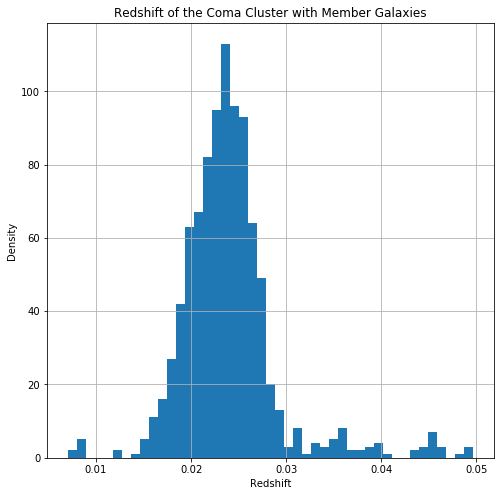

In [26]:
#Getting the new histogram with member galaxies for a 4th time

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma4 = x0
uncertainty4 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [27]:
#Recessional velocity of Coma Cluster with member galaxies for a 4th time

recvel4 = redcoma4 * 3e5
recvel_error4 = (sigma/redcoma4)*recvel4

print("The recessional velocity of the Coma Cluster is:",recvel4,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error4,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [28]:
#Distance to the Coma Cluster with member galaxies for a 4th time

H = 67.8 #km/s/Mpc
dist4 = recvel4/H
dist_error4 = (recvel_error4/recvel4)*dist4

print("The distance to the Coma Cluster is:",dist4,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error4,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [29]:
#Projected radial distance for Coma Cluster with member galaxies

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra4,weighteddec4,dist4)

Iterating for a fifth time:

In [30]:
data5 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma2-d['z']) <= (3*sigma):
        data5.append(d)
        
len(data5)

468

In [31]:
#Getting the weighted means of right ascensions and declinations for a 5th time

r5 = [d['r'] for d in data5]
ra5 = [d['ra']*d['r'] for d in data5]
dec5 = [d['dec']*d['r'] for d in data5]
z5 = [d['z'] for d in data5]

weightedra5 = sum(ra5)/sum(r5)
weighteddec5 = sum(dec5)/sum(r5)

print("The weighted mean of right ascension using member galaxies is:",weightedra5)
print("The weighted mean of declination using member galaxies is:",weighteddec5)

The weighted mean of right ascension using member galaxies is: 194.79997014219012
The weighted mean of declination using member galaxies is: 27.87805354772684


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


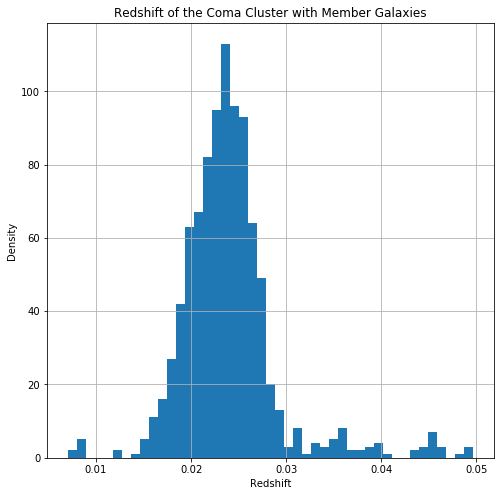

In [32]:
#Getting the new histogram with member galaxies for a 5th time

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma5 = x0
uncertainty5 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [33]:
#Recessional velocity of Coma Cluster with member galaxies for a 5th time

recvel5 = redcoma5 * 3e5
recvel_error5 = (sigma/redcoma5)*recvel5

print("The recessional velocity of the Coma Cluster is:",recvel5,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error5,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [34]:
#Distance to the Coma Cluster with member galaxies for a 5th time

H = 67.8 #km/s/Mpc
dist5 = recvel5/H
dist_error5 = (recvel_error5/recvel5)*dist5

print("The distance to the Coma Cluster is:",dist5,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error5,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [35]:
#Projected radial distance for Coma Cluster with member galaxies

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra5,weighteddec5,dist5)

In [36]:
data6 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma2-d['z']) <= (3*sigma):
        data6.append(d)
        
len(data6)

468

In [37]:
#Getting the weighted means of right ascensions and declinations for a 6th time

r6 = [d['r'] for d in data6]
ra6 = [d['ra']*d['r'] for d in data6]
dec6 = [d['dec']*d['r'] for d in data6]
z6 = [d['z'] for d in data6]

weightedra6 = sum(ra6)/sum(r6)
weighteddec6 = sum(dec6)/sum(r6)

print("The weighted mean of right ascension using member galaxies is:",weightedra6)
print("The weighted mean of declination using member galaxies is:",weighteddec6)

The weighted mean of right ascension using member galaxies is: 194.79997014219012
The weighted mean of declination using member galaxies is: 27.87805354772684


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


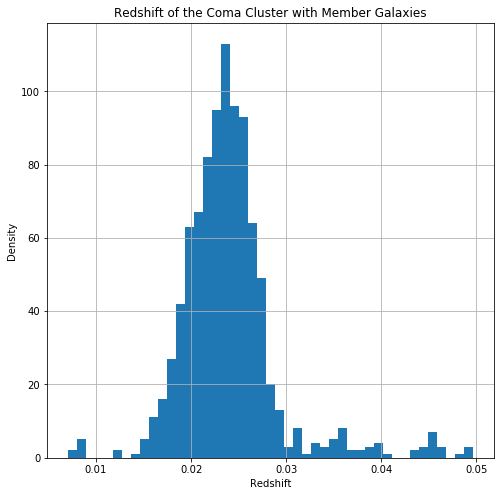

In [38]:
#Getting the new histogram with member galaxies for a 6th time

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma6 = x0
uncertainty6 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [39]:
#Recessional velocity of Coma Cluster with member galaxies for a 6th time

recvel6 = redcoma6 * 3e5
recvel_error6 = (sigma/redcoma6)*recvel6

print("The recessional velocity of the Coma Cluster is:",recvel6,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error6,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [40]:
#Distance to the Coma Cluster with member galaxies for a 6th time

H = 67.8 #km/s/Mpc
dist6 = recvel6/H
dist_error6 = (recvel_error6/recvel6)*dist6

print("The distance to the Coma Cluster is:",dist6,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error6,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


In [41]:
#Projected radial distance for Coma Cluster with member galaxies

for d in data:
    d['radist'] = raDist(d['ra'],d['dec'],weightedra6,weighteddec6,dist6)

In [42]:
data7 = []
for d in data:
    if d['radist'] <= 1.5e6 and abs(redcoma2-d['z']) <= (3*sigma):
        data7.append(d)
        
len(data7)

468

In [43]:
#Getting the weighted means of right ascensions and declinations for a 7th time

r7 = [d['r'] for d in data7]
ra7 = [d['ra']*d['r'] for d in data7]
dec7 = [d['dec']*d['r'] for d in data7]
z7 = [d['z'] for d in data7]

weightedra7 = sum(ra7)/sum(r7)
weighteddec7 = sum(dec7)/sum(r7)

print("The weighted mean of right ascension using member galaxies is:",weightedra7)
print("The weighted mean of declination using member galaxies is:",weighteddec7)

The weighted mean of right ascension using member galaxies is: 194.79997014219012
The weighted mean of declination using member galaxies is: 27.87805354772684


The redshift of the Coma Cluster with memeber galaxies is: 0.023382687104674903
The uncertainty of the redshift is: 0.0030813139163038275


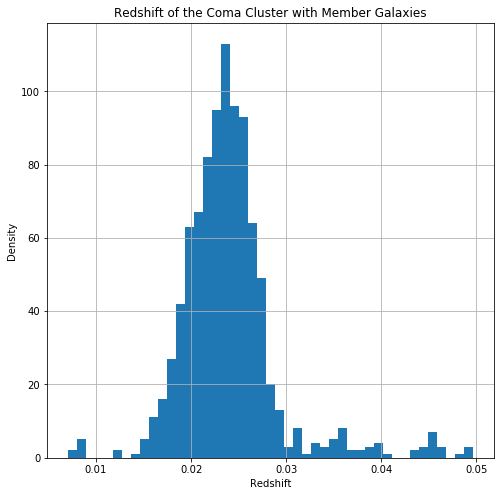

In [44]:
#Getting the new histogram with member galaxies for a 7th time

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(z, bins=45,)
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n
plt.title('Redshift of the Coma Cluster with Member Galaxies')
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Density')
H, A, x0, sigma = Gfit(xdata,ydata)
redcoma7 = x0
uncertainty7 = sigma

print("The redshift of the Coma Cluster with memeber galaxies is:",x0)
print("The uncertainty of the redshift is:",sigma)

In [45]:
#Recessional velocity of Coma Cluster with member galaxies for a 7th time

recvel7 = redcoma7 * 3e5
recvel_error7 = (sigma/redcoma7)*recvel7

print("The recessional velocity of the Coma Cluster is:",recvel7,"km/s")
print("The uncertainty on the recessional velocity is:",recvel_error7,"km/s")

The recessional velocity of the Coma Cluster is: 7014.806131402471 km/s
The uncertainty on the recessional velocity is: 924.3941748911483 km/s


In [46]:
#Distance to the Coma Cluster with member galaxies for a 7th time

H = 67.8 #km/s/Mpc
dist7 = recvel7/H
dist_error7 = (recvel_error7/recvel7)*dist7

print("The distance to the Coma Cluster is:",dist7,"Mpc")
print("The uncertainty to the Coma Cluster is:",dist_error7,"Mpc")

The distance to the Coma Cluster is: 103.46321727732258 Mpc
The uncertainty to the Coma Cluster is: 13.634132373025787 Mpc


7 iterations is a good number to choose because as we can see, the values of the different attributes to the Coma Cluster is staying constant; therefore, we can now proceed in plotting the RA/DEC plot with the circle of selected galaxies.

In [47]:
finalra = [i['ra'] for i in data7]
finaldec = [i['dec'] for i in data7]
finalz = [i['z'] for i in data7]

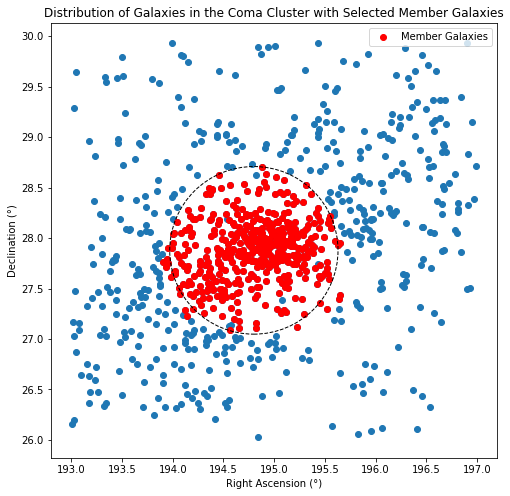

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(ra,dec)
plt.scatter(finalra,finaldec,c='r',label='Member Galaxies')
cc = plt.Circle((weightedra7,weighteddec7),0.83,fill=False,linestyle='--') 
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(cc)
plt.title('Distribution of Galaxies in the Coma Cluster with Selected Member Galaxies')
plt.legend(loc='upper right')
plt.xlabel('Right Ascension (°)')
plt.ylabel('Declination (°)')
plt.savefig('Distribution of Galaxies in the Coma Cluster with Selected Member Galaxies')

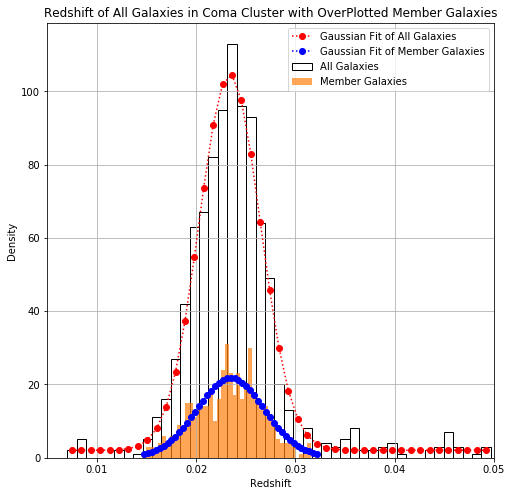

In [49]:
#Plotting the imposed histograms for all and member galaxies
plt.figure(figsize=(8,8))

#All galaxies
n, bins, patches = plt.hist(z, bins=45,fill=False, label='All Galaxies')
xdata = [(bins[n]+bins[n+1])/2 for n in range(bins.shape[0]-1)]
ydata = n

#Member galaxies
N, BINS, PATCHES = plt.hist(finalz, bins=45, alpha=0.7, label='Member Galaxies')
Xdata = [(BINS[n]+BINS[n+1])/2 for n in range(BINS.shape[0]-1)]
Ydata = N
plt.legend()

plt.plot(xdata,Gfunc(xdata,*Gfit(xdata,ydata)),'ro:',label='Gaussian Fit of All Galaxies')
plt.plot(Xdata,Gfunc(Xdata,*Gfit(Xdata,Ydata)),'bo:',label='Gaussian Fit of Member Galaxies')
plt.title('Redshift of All Galaxies in Coma Cluster with OverPlotted Member Galaxies')
plt.grid()
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Density')
plt.xlim(0.005,0.05)
plt.savefig("Redshift of All Galaxies in Coma Cluster with OverPloted Member Galaxies")

In [50]:
#Using SDSS r-mags and extinction values in r-band to calculate absolute r-mags and their errors

for d in data7:
    d['abs_mag'] = d['r'] +5 - d['extinction_r'] - 5*log10(dist2*(10**6))
    d['abs_rErr'] = abs(d['abs_mag']) * (sqrt((d['err_r']/d['r'])**2 + (0.434*(dist_error2/dist2)/log10(dist2*(10**6)))**2))
    
#Getting luminosity from abs-mags

#The below for loop calculates the luminosity in terms of solar luminosity and the error

Msun = 4.76
for d in data7:
    d['lum'] = 10**(0.4*(Msun-d['abs_mag']))
    d['lum_error'] = d['lum']*2.303*0.4*abs(d['abs_rErr'])

In [51]:
#Cumulative luminosity of the cluster as a function of radial distance from center

def Clum(r):
    return sum([d['lum'] for d in data7 if d['radist'] <= r])

def Cerr(r):
    return sum([d['lum_error'] for d in data7 if d['radist'] <= r])

radial_dist = linspace(0,1.5e6,15)
s = []
for rad in radial_dist:
    s.append(Clum(rad))

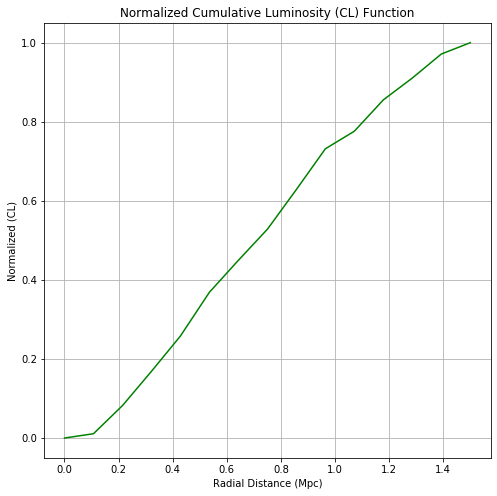

In [52]:
#Plotting normalized CDF of luminosity

X = radial_dist/10e5
Y = s/Clum(1.5e6)

plt.figure(figsize=(8,8))
plt.plot(X,Y,'g-')
plt.title("Normalized Cumulative Luminosity (CL) Function")
plt.xlabel('Radial Distance (Mpc)')
plt.ylabel('Normalized (CL)')
plt.grid()

In [53]:
#Getting Re (effective radius) by interpolating the function at 0.5

Re = interp(0.5,s/Clum(1.5e6),radial_dist)
print("The effective radius of is given by:",round(Re/10e5,3),"Mpc")
print("The uncertainty on the effective radius is:",round((Cerr(Re)/(0.5*Clum(1.5e6)))*Re/1e6,3),"Mpc")

#Converting Re to R1/2

Rhalf = Re*(4/3)
print("The radius of half-mass is:",round(Rhalf/10e5,3),"Mpc")
print("The uncertainty on the half-mass radius is:",round((0.132/0.722)*Rhalf/1e6,3),"Mpc")

The effective radius of is given by: 0.712 Mpc
The uncertainty on the effective radius is: 0.096 Mpc
The radius of half-mass is: 0.949 Mpc
The uncertainty on the half-mass radius is: 0.173 Mpc


In [54]:
#Line of sight

for n in data7:
    n['ls'] = 3e5*n['z']
    n['ls_error'] = n['ls'] * (n['zErr']/n['z'])
    
#Peculiar velocity

for pec in data7:
    pec['pecvel'] = pec['ls'] - recvel2

The velocity disperson is: 1027.0 km/s
The average of peculiar velocities is: 21.04 km/s


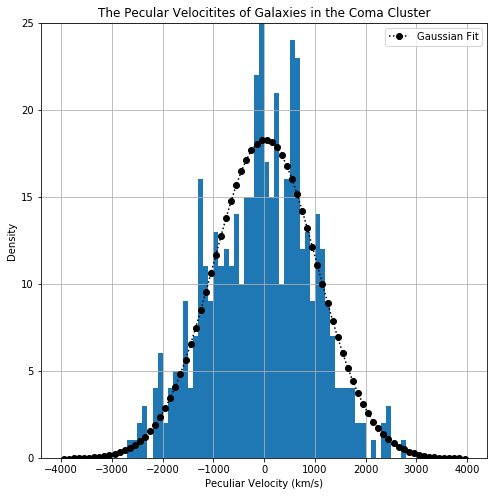

In [55]:
#Histogram for velocity dispersion

plt.figure(figsize=(8,8))
pecvel = [d['pecvel'] for d in data7]

nn, binss, patchess = plt.hist(pecvel,bins=np.arange(-4000,4100,100))
xxdata = [(binss[d] + binss[d+1])/2 for d in range(binss.shape[0]-1)]
yydata = nn

H,A,x0,sigma = Gfit(xxdata,yydata)
pecvelavg = x0
veldisp = sigma
plt.plot(xxdata,Gfunc(xxdata,*Gfit(xxdata,yydata)),'ko:',label='Gaussian Fit')
plt.legend()
plt.title('The Pecular Velocitites of Galaxies in the Coma Cluster')
plt.xlabel('Peculiar Velocity (km/s)')
plt.ylabel('Density')
plt.grid()
plt.ylim(0,25)
plt.savefig("The Peculiar Velocities of Galaxies in the Coma Cluster")

print("The velocity disperson is:",round(veldisp,),"km/s")
print("The average of peculiar velocities is:",round(pecvelavg,2),"km/s")

In [56]:
#The half-mass of Coma Cluster

Mhalf = (3*Rhalf/4.3e-3) * veldisp**2
print("The half mass of the Coma Cluster is:","{:.2e}".format(Mhalf),"Msun")
print("The uncertainty of the half-mass is:","{:.2e}".format((0.176/0.962)*Mhalf),"Msun")

#The luminosity at half-mass radius

Lrhalf = interp(Rhalf,radial_dist,s)
print("The total luminosity within the half-mass radius is:","{:.2e}".format(Lrhalf),"Lsun")
print("The uncertainty on this luminosity is:","{:.2e}".format((0.176/0.962)*Lrhalf),"Lsun")

#The ML ratio using ratio of virial mass and total luminosity

MLratio = int(Mhalf/Lrhalf)
print("The ML ratio of the Coma Cluster is:",MLratio,"Msun/Lsun")

The half mass of the Coma Cluster is: 6.99e+14 Msun
The uncertainty of the half-mass is: 1.28e+14 Msun
The total luminosity within the half-mass radius is: 2.77e+12 Lsun
The uncertainty on this luminosity is: 5.06e+11 Lsun
The ML ratio of the Coma Cluster is: 252 Msun/Lsun
